# PCA analysis results for the Barabási-Albert networks case study


The following results are related to the Barabási-Albert networks that were sampled in the ``2-multivariate-analysis/pca_analysis_ba.ipynb`` notebook. Here, the sampled data generated in that notebook is used to create 2d and 3d scatterplots for the principal components for different combinations and directions of visualization. Lastly, a distance analysis is performed, where the euclidian distance between the original networks and its samples are obtained considering the scores from the 3 principal components that explain more variance in the data.

In [2]:
from samnet import *

Load data obtained for the BA networks case study:

In [3]:
df = pd.read_csv('2_multivariate_analysis/data/pca_ba_robust_example.csv')

In [4]:
df.shape

(37510, 50)

In [5]:
df.head()

,Assortativity,Transitivity,Av. shortest p.,Complexity Coef,1m Degree,2m Degree,3m Degree,4m Degree,H Degree,1m L. clustering,...,2m Eigenvector,3m Eigenvector,4m Eigenvector,H Eigenvector,len,method,net id,Component0,Component1,Component2
0,-0.108169,0.044497,3.043032,11.820426,5.940000,70.213333,1724.460000,62876.293333,0.882092,0.079138,...,0.003333,0.000560,0.000148,0.099845,300,Original,0,-1.803036,0.775470,-0.502186
1,-0.749980,0.012766,2.600000,7.911765,2.266667,17.933333,267.066667,4648.333333,0.412403,0.013624,...,0.033333,0.012106,0.006090,0.406351,30,SB,0,1.041244,0.806296,0.595316
2,-0.402381,0.000000,5.241379,2.354839,2.066667,4.866667,13.266667,42.466667,0.412998,0.000000,...,0.033333,0.011679,0.004971,0.523663,30,RWS,0,1.057162,-0.066579,-0.421944
3,-0.075121,0.199052,2.682759,4.981132,3.533333,17.600000,112.533333,865.200000,0.839682,0.118124,...,0.033333,0.009880,0.003451,0.555322,30,IRWS,0,0.187667,1.189324,-1.029855
4,-0.059827,0.072289,3.618391,3.515152,2.200000,7.733333,41.400000,286.933333,0.573639,0.019630,...,0.033333,0.012159,0.005249,0.500939,30,TR,0,1.003363,0.290941,-0.099918


## 2d Scatterplots for the 2 most important principal components (by explained variability)

In [6]:
plt.style.use('ggplot')

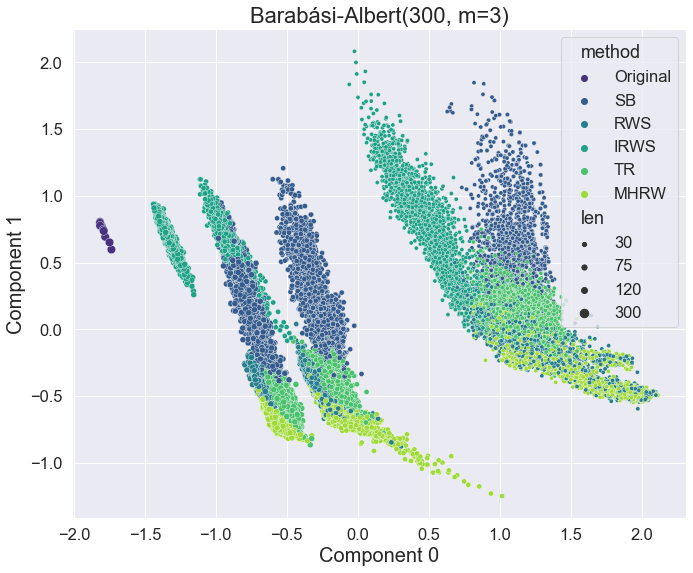

In [7]:
plt.figure(figsize=(11,9))
sns.set(font_scale = 1.5)
g = sns.scatterplot(data=df, x="Component0", y="Component1", size='len', hue="method", palette="viridis")
g.set_xlabel("Component 0",fontsize=20)
g.set_ylabel("Component 1",fontsize=20)
plt.title('Barabási-Albert(300, m=3)', fontsize=22)
plt.savefig('images/ba_2d_components', bbox_inches='tight', dpi=250)

## 3d Scatterplots for the 3 most important principal components (by explained variability)

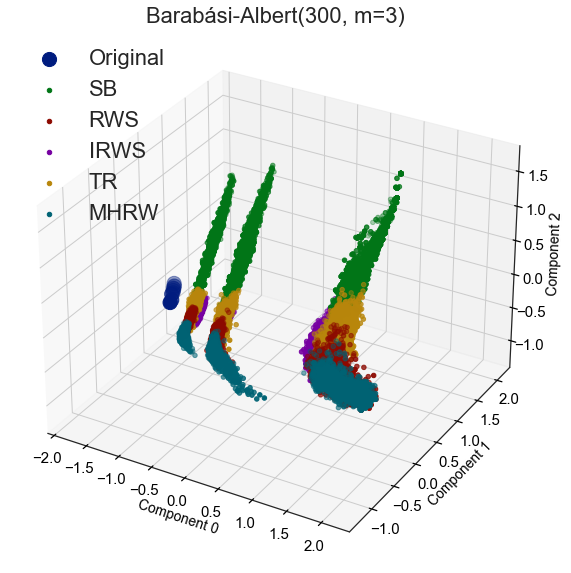

In [8]:
plt.style.use('seaborn-ticks')
plt.style.use('seaborn-dark-palette')

m = df["method"]
sizes = df["len"]

plt.rc('xtick', labelsize = 15, color='black') 
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection='3d')

xs = df['Component0']
ys = df['Component1']
zs = df['Component2']


for method in m.unique():  
    if method == "Original":
        ax.scatter(xs[m.values == method], ys[m.values == method], zs[m.values == method], label = method, s = 200)
    else:
        ax.scatter(xs[m.values == method], ys[m.values == method], zs[m.values == method], label = method)

ax.legend(fontsize = 22, loc = 'upper left')

ax.set_xlabel('Component 0', fontsize = 14, color='black');
ax.set_ylabel('Component 1', fontsize = 14, color='black');
ax.set_zlabel('Component 2', fontsize = 14, color='black');

plt.tight_layout()
#plt.savefig('MaierPCA123_all.png', bbox_inches='tight', dpi = 200)
plt.title('Barabási-Albert(300, m=3)',fontsize=22)
plt.savefig('images/ba_3d_components', bbox_inches='tight', dpi=250)
plt.show()

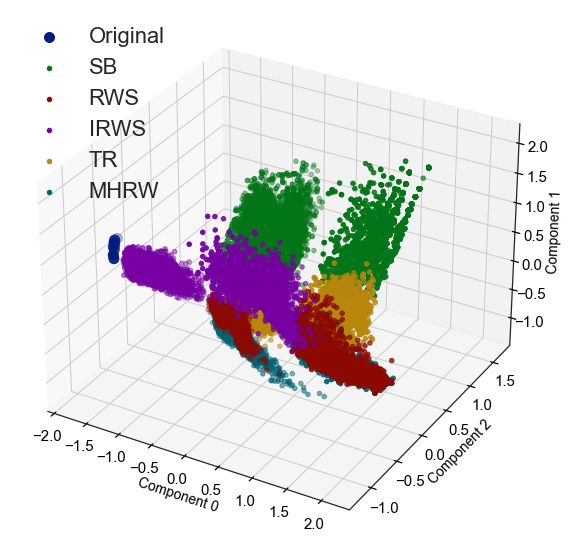

In [9]:
plt.style.use('seaborn-ticks')
plt.style.use('seaborn-dark-palette')

m = df["method"]
sizes = df["len"]

plt.rc('xtick', labelsize = 15, color='black') 
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection='3d')

xs = df['Component0']
ys = df['Component2']
zs = df['Component1']


for method in m.unique():  
    if method == "Original":
        ax.scatter(xs[m.values == method], ys[m.values == method], zs[m.values == method], label = method, s = 100)
    else:
        ax.scatter(xs[m.values == method], ys[m.values == method], zs[m.values == method], label = method)

ax.legend(fontsize = 22, loc = 'upper left')

ax.set_xlabel('Component 0', fontsize = 14, color='black');
ax.set_ylabel('Component 2', fontsize = 14, color='black');
ax.set_zlabel('Component 1', fontsize = 14, color='black');

plt.tight_layout()
#plt.savefig('MaierPCA123_all.png', bbox_inches='tight', dpi = 200)
plt.show()

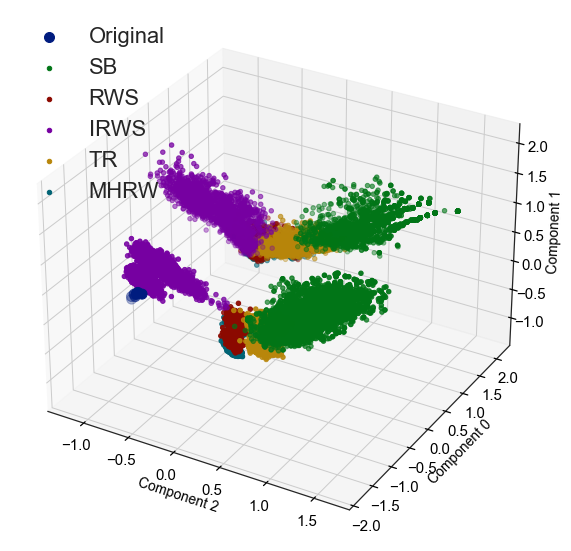

In [10]:
plt.style.use('seaborn-ticks')
plt.style.use('seaborn-dark-palette')

m = df["method"]
sizes = df["len"]

plt.rc('xtick', labelsize = 15, color='black') 
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection='3d')

xs = df['Component2']
ys = df['Component0']
zs = df['Component1']

for method in m.unique():  
    if method == "Original":
        ax.scatter(xs[m.values == method], ys[m.values == method], zs[m.values == method], label = method, s = 100)
    else:
        ax.scatter(xs[m.values == method], ys[m.values == method], zs[m.values == method], label = method)

ax.legend(fontsize = 22, loc = 'upper left')

ax.set_xlabel('Component 2', fontsize = 14, color='black');
ax.set_ylabel('Component 0', fontsize = 14, color='black');
ax.set_zlabel('Component 1', fontsize = 14, color='black');

plt.tight_layout()
#plt.savefig('MaierPCA123_all.png', bbox_inches='tight', dpi = 200)
plt.show()

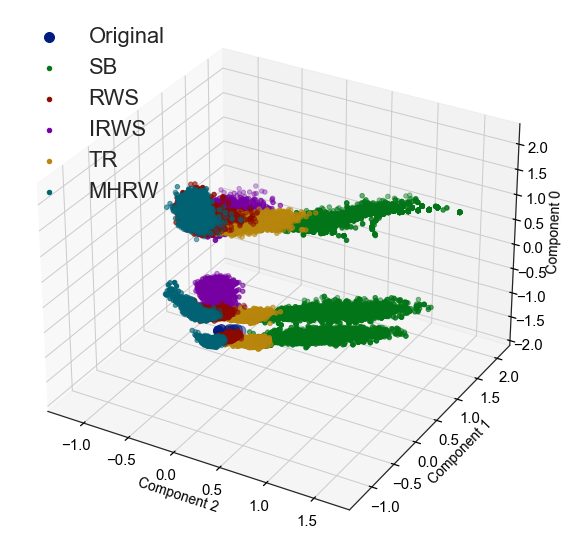

In [11]:
plt.style.use('seaborn-ticks')
plt.style.use('seaborn-dark-palette')

m = df["method"]
sizes = df["len"]

plt.rc('xtick', labelsize = 15, color='black') 
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection='3d')

xs = df['Component2']
ys = df['Component1']
zs = df['Component0']

for method in m.unique():  
    if method == "Original":
        ax.scatter(xs[m.values == method], ys[m.values == method], zs[m.values == method], label = method, s = 100)
    else:
        ax.scatter(xs[m.values == method], ys[m.values == method], zs[m.values == method], label = method)

ax.legend(fontsize = 22, loc = 'upper left')

ax.set_xlabel('Component 2', fontsize = 14, color='black');
ax.set_ylabel('Component 1', fontsize = 14, color='black');
ax.set_zlabel('Component 0', fontsize = 14, color='black');

plt.tight_layout()
#plt.savefig('MaierPCA123_all.png', bbox_inches='tight', dpi = 200)
plt.show()

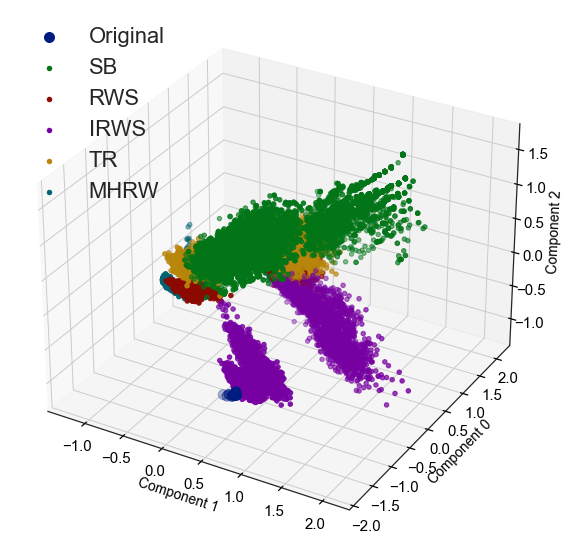

In [12]:
plt.style.use('seaborn-ticks')
plt.style.use('seaborn-dark-palette')

m = df["method"]
sizes = df["len"]

plt.rc('xtick', labelsize = 15, color='black') 
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection='3d')

xs = df['Component1']
ys = df['Component0']
zs = df['Component2']

for method in m.unique():  
    if method == "Original":
        ax.scatter(xs[m.values == method], ys[m.values == method], zs[m.values == method], label = method, s = 100)
    else:
        ax.scatter(xs[m.values == method], ys[m.values == method], zs[m.values == method], label = method)

ax.legend(fontsize = 22, loc = 'upper left')

ax.set_xlabel('Component 1', fontsize = 14, color='black');
ax.set_ylabel('Component 0', fontsize = 14, color='black');
ax.set_zlabel('Component 2', fontsize = 14, color='black');

plt.tight_layout()
#plt.savefig('MaierPCA123_all.png', bbox_inches='tight', dpi = 200)
plt.show()

<br>
<br>
<br>

# Distances calculus

The following analysis obtains the mean and variance of the euclidean distances between the original network and its samples considering each method and sample size. The distance is obtained using the scores of the 3 principal components that explain more variability in the data.

The "dfo" variable contains the scores for the components (Component0, Component1 and Component3) of the original BA networks.

In [22]:
dfo = df[df['method']=='Original'][['net id', 'Component0', 'Component1', 'Component2']]

In [23]:
dfo

,net id,Component0,Component1,Component2
0,0,-1.803036,0.775470,-0.502186
3751,1,-1.734868,0.598433,-0.591706
7502,2,-1.813658,0.798067,-0.437591
11253,3,-1.815012,0.805986,-0.482912
15004,4,-1.815282,0.798539,-0.479639
18755,5,-1.778580,0.693722,-0.530212
22506,6,-1.814331,0.776669,-0.495240
26257,7,-1.748051,0.651977,-0.586155
30008,8,-1.791327,0.747538,-0.509952
33759,9,-1.788723,0.736943,-0.536717


Then, this dataframe is left joined considering the net id to the original dataframe so each sample row also contains the score of the corresponding original network from where it was obtained:

In [24]:
merged = df.merge(dfo, how='left', on='net id')

The relevant columns are mantained:

In [25]:
merged = merged[['len', 'method', 'net id', 'Component0_x', 'Component1_x' , 'Component2_x', 'Component0_y', 'Component1_y' , 'Component2_y']].copy()

The distances are then calculated considering the euclidean distance for each sample:
$$d = \sqrt{(C0_{original} - C0_{sampled})^2 + (C1_{original}- C1_{sampled})^2 + (C2_{original} - C2_{sampled})^2}$$

In [26]:
merged['distance'] = np.sqrt((merged['Component0_x'] - merged['Component0_y'])**2 + 
                             (merged['Component1_x'] - merged['Component1_y'])**2 + 
                             (merged['Component2_x'] - merged['Component2_y'])**2)

In [30]:
distances_df = merged[['method', 'len', 'distance']].copy()

In [34]:
distances_df = distances_df[distances_df.method!='Original']

Finally, the mean and variance of the distances for each combination of method and sample size (len) are obtained:

In [36]:
distances_df.groupby(by=['method', 'len']).agg(["mean", "var"]).sort_values(by='len').reset_index()

method  len  distance          
                    mean       var
0    IRWS   30  2.330043  0.025065
1    MHRW   30  3.484280  0.128112
2     RWS   30  3.266733  0.147806
3      SB   30  3.222591  0.056135
4      TR   30  3.029596  0.029373
5    IRWS   75  0.918953  0.009048
6    MHRW   75  2.228228  0.028399
7     RWS   75  1.992667  0.016298
8      SB   75  2.084454  0.024821
9      TR   75  2.107482  0.012557
10   IRWS  120  0.502841  0.001869
11   MHRW  120  1.923971  0.008606
12    RWS  120  1.710221  0.005847
13     SB  120  1.749347  0.018454
14     TR  120  1.950789  0.005897

In [43]:
print(distances_df.groupby(by=['method', 'len']).agg(["mean", "var"]).sort_values(by='len').reset_index().to_latex())

\begin{tabular}{llrrr}
\toprule
{} & method &  len & \multicolumn{2}{l}{distance} \\
{} &      mean &       var \\
\midrule
0  &   IRWS &   30 &  2.330043 &  0.025065 \\
1  &   MHRW &   30 &  3.484280 &  0.128112 \\
2  &    RWS &   30 &  3.266733 &  0.147806 \\
3  &     SB &   30 &  3.222591 &  0.056135 \\
4  &     TR &   30 &  3.029596 &  0.029373 \\
5  &   IRWS &   75 &  0.918953 &  0.009048 \\
6  &   MHRW &   75 &  2.228228 &  0.028399 \\
7  &    RWS &   75 &  1.992667 &  0.016298 \\
8  &     SB &   75 &  2.084454 &  0.024821 \\
9  &     TR &   75 &  2.107482 &  0.012557 \\
10 &   IRWS &  120 &  0.502841 &  0.001869 \\
11 &   MHRW &  120 &  1.923971 &  0.008606 \\
12 &    RWS &  120 &  1.710221 &  0.005847 \\
13 &     SB &  120 &  1.749347 &  0.018454 \\
14 &     TR &  120 &  1.950789 &  0.005897 \\
\bottomrule
\end{tabular}

